## Gaussian mixture models (GMM) vs K-means

https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
import numpy as np
import pandas

from sklearn.datasets.samples_generator import make_blobs
from matplotlib.patches import Ellipse


from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture as GMM
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering



### dataset

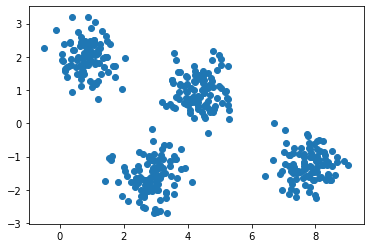

In [24]:
# Generate some data
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=.5, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

plt.scatter(X[:, 0], X[:, 1])

### K-means with circular clusters

In [9]:
labels

array([0, 1, 1, 2, 1, 0, 3, 2, 1, 3, 0, 3, 2, 1, 1, 3, 1, 3, 2, 1, 1, 1,
       0, 2, 2, 0, 0, 2, 2, 3, 2, 2, 1, 2, 1, 0, 3, 2, 3, 2, 1, 0, 3, 2,
       3, 0, 3, 3, 3, 0, 0, 0, 1, 0, 0, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 1,
       3, 2, 1, 0, 1, 2, 1, 0, 3, 1, 2, 1, 0, 1, 1, 2, 3, 0, 2, 1, 1, 2,
       1, 3, 1, 3, 2, 1, 1, 0, 2, 3, 3, 3, 0, 3, 2, 2, 1, 0, 2, 0, 3, 1,
       1, 1, 2, 1, 0, 3, 0, 1, 0, 0, 3, 1, 3, 0, 2, 0, 3, 3, 3, 2, 0, 0,
       0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 3, 2, 1, 3, 1, 3, 2, 3, 2,
       0, 1, 3, 1, 1, 1, 2, 1, 0, 1, 1, 0, 3, 3, 1, 0, 0, 0, 0, 3, 3, 3,
       2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 3,
       3, 2, 2, 1, 3, 3, 0, 2, 1, 0, 2, 0, 2, 2, 3, 3, 0, 3, 2, 0, 3, 0,
       1, 2, 0, 1, 1, 1, 3, 0, 2, 0, 2, 1, 2, 2, 0, 3, 1, 3, 2, 1, 3, 2,
       2, 0, 3, 2, 0, 2, 3, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 2, 3, 2, 2, 0, 1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0,
       3, 2, 3, 2, 3, 1, 2, 3, 1, 2, 3, 3, 2, 1, 0,

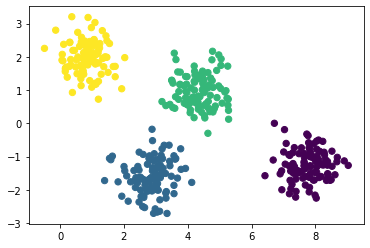

In [8]:
# Plot the data with K Means Labels

kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [10]:


def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

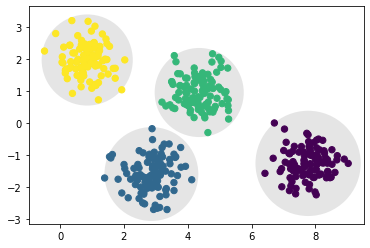

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

### K-means with non-circular clusters

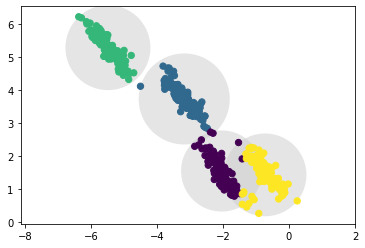

In [12]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

### GMM with circular clusters

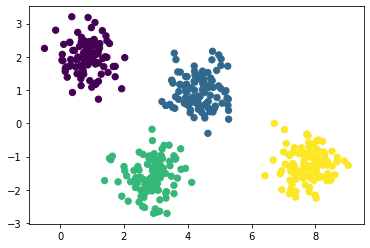

In [25]:
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [26]:
labels

array([3, 2, 2, 1, 2, 3, 0, 1, 2, 0, 3, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2,
       3, 1, 1, 3, 3, 1, 1, 0, 1, 1, 2, 1, 2, 3, 0, 1, 0, 1, 2, 3, 0, 1,
       0, 3, 0, 0, 0, 3, 3, 3, 2, 3, 3, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 1, 2, 3, 2, 1, 2, 3, 0, 2, 1, 2, 3, 2, 2, 1, 0, 3, 1, 2, 2, 1,
       2, 0, 2, 0, 1, 2, 2, 3, 1, 0, 0, 0, 3, 0, 1, 1, 2, 3, 1, 3, 0, 2,
       2, 2, 1, 2, 3, 0, 3, 2, 3, 3, 0, 2, 0, 3, 1, 3, 0, 0, 0, 1, 3, 3,
       3, 2, 1, 2, 3, 1, 3, 2, 1, 2, 2, 3, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1,
       3, 2, 0, 2, 2, 2, 1, 2, 3, 2, 2, 3, 0, 0, 2, 3, 3, 3, 3, 0, 0, 0,
       1, 2, 1, 3, 1, 3, 2, 1, 3, 2, 3, 1, 1, 3, 1, 1, 3, 2, 3, 3, 3, 0,
       0, 1, 1, 2, 0, 0, 3, 1, 2, 3, 1, 3, 1, 1, 0, 0, 3, 0, 1, 3, 0, 3,
       2, 1, 3, 2, 2, 2, 0, 3, 1, 3, 1, 2, 1, 1, 3, 0, 2, 0, 1, 2, 0, 1,
       1, 3, 0, 1, 3, 1, 0, 2, 2, 0, 2, 1, 3, 3, 1, 1, 0, 3, 1, 2, 2, 2,
       3, 1, 1, 1, 1, 1, 0, 1, 1, 3, 2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3,
       0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 2, 3,

In [27]:
X

array([[ 6.71279919e+00,  3.44421047e-04],
       [ 2.58793640e+00, -2.50280606e+00],
       [ 3.04362447e+00, -2.67121403e+00],
       [ 4.31252691e+00,  7.48503827e-01],
       [ 2.47339658e+00, -2.36751312e+00],
       [ 7.81041797e+00, -1.62719120e+00],
       [ 8.48588465e-01,  2.19522982e+00],
       [ 4.19741719e+00,  1.69321155e-01],
       [ 3.00855148e+00, -1.74649877e+00],
       [ 1.20784281e+00,  1.81543961e+00],
       [ 7.82236390e+00, -9.99229572e-01],
       [ 3.05723340e-01,  2.44189401e+00],
       [ 3.57660449e+00,  2.11114739e+00],
       [ 3.31803124e+00, -2.25017136e+00],
       [ 2.95031031e+00, -9.14468731e-01],
       [ 1.09271032e+00,  3.03322368e+00],
       [ 1.81716162e+00, -1.76133611e+00],
       [ 4.91167166e-01,  1.69546533e+00],
       [ 3.96138228e+00,  1.17744090e+00],
       [ 3.44186834e+00, -1.27755888e+00],
       [ 3.43260168e+00, -1.14120104e+00],
       [ 2.70572345e+00, -1.98128564e+00],
       [ 7.26536187e+00, -1.83707026e+00],
       [ 4.

In [28]:
probs = gmm.predict_proba(X)
print(probs[:50].round(3))

[[0.    0.002 0.    0.998]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.999 0.001 0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    0.999 0.001 0.   ]
 [0.    1.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1f6f4ad90>]],
      dtype=object)

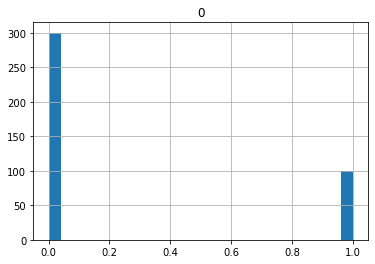

In [29]:
pandas.DataFrame(probs[:,0] ).hist(bins=25)

In [ ]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [30]:

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

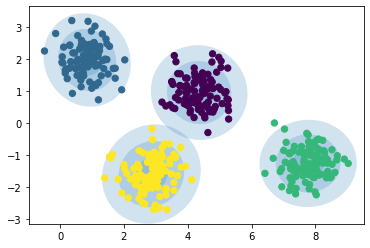

In [31]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

### GMM with non-circular clusters

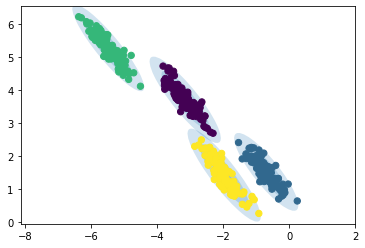

In [32]:

gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

### moon shaped clusters

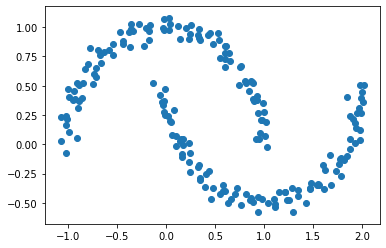

In [33]:
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

#### K-means

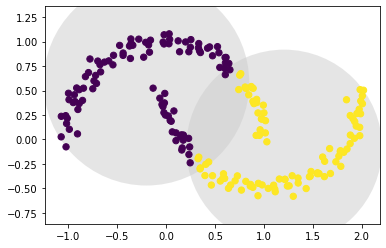

In [34]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, Xmoon)

#### 2 clusters

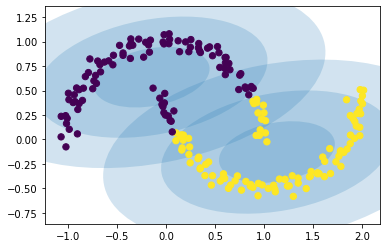

In [35]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

#### 4 clusters

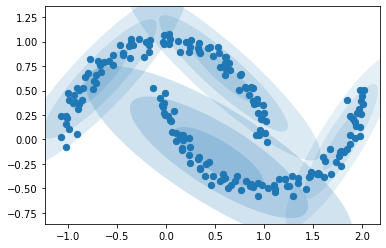

In [36]:
gmm4 = GMM(n_components=4, covariance_type='full', random_state=0)
plot_gmm(gmm4, Xmoon, label=False)

#### 16 clusters

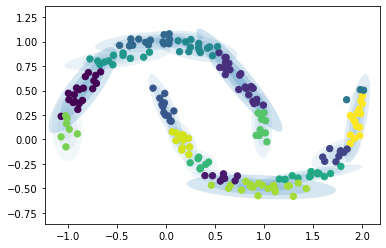

In [37]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=True)

### GMM is a generative model - cool!

#### generate new (fake) data using gmm2

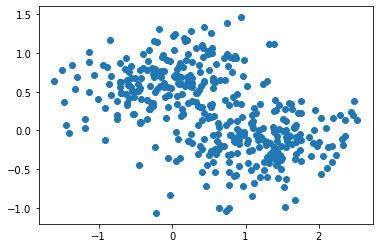

In [38]:
Xnew = gmm2.sample(400)
plt.scatter(Xnew[0][:,0], Xnew[0][:,1]);

#### generate new (fake) data using gmm4

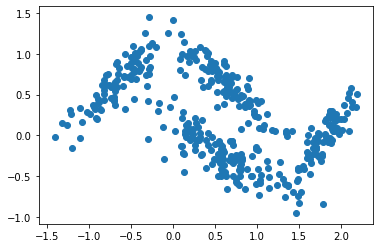

In [39]:
Xnew = gmm4.sample(400)
plt.scatter(Xnew[0][:,0], Xnew[0][:,1]);

#### generate new (fake) data using gmm16

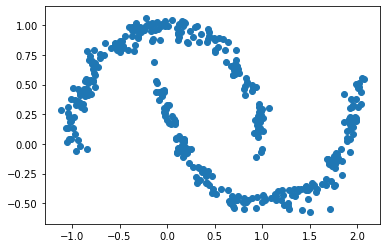

In [40]:
Xnew = gmm16.sample(400)
plt.scatter(Xnew[0][:,0], Xnew[0][:,1]);

### Spectral clustering 

essentially k-means w/ nearest neighbors as an input

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In practice Spectral Clustering is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. For instance when clusters are nested circles on the 2D plane.

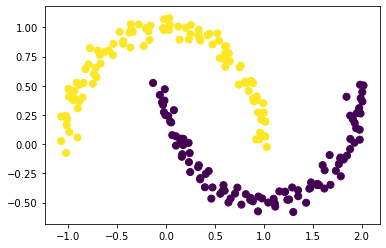

In [41]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(Xmoon)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=labels,
            s=50, cmap='viridis');